In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2,venn2_circles

In [3]:
## Stat file is a combined version of 'Additional File 1.csv', 'Additional File 2.csv', and  'Additional File 3.csv' ##

Stat_file = pd.read_csv('Stat_file.csv', index_col=0)

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

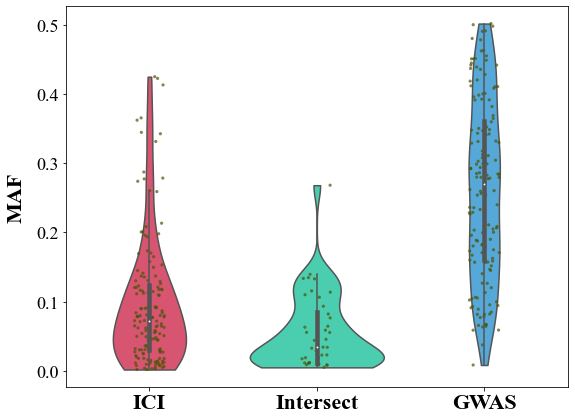

In [5]:
## Prepare top 189 IBI and GWAS SNPs' MAF values for figure 3e ##

lgM_sGD = Stat_file.copy() 
lgM_sGD = lgM_sGD.sort_values('Rank_Ms,r')[:188] # Select top 189 IBI SNPs based on Ms,r

pvalue = Stat_file.copy()
pvalue = pvalue.sort_values('Rank_p-value')[:188] # Select top 189 GWAS SNPs based on Pvalue

lgM_sGD_idxlist = lgM_sGD.index.tolist() # Collect as list
pvalue_idxlist = pvalue.index.tolist() # Collect as list

intersect = set(pvalue_idxlist).intersection(lgM_sGD_idxlist) # Intersect between IBI and GWAS SNPs
len(intersect)

lgM_sGD_idx_set = set(lgM_sGD_idxlist) # Convert list to set
pvalue_idx_set = set(pvalue_idxlist) # Convert list to set
only_ibi = lgM_sGD_idx_set - intersect
only_gwas = pvalue_idx_set - intersect
intersect = intersect

maf_marginal = Stat_file.copy()
maf_marginal = maf_marginal[maf_marginal.index.isin(list(only_ibi))] # Collect DataFrame for IBI

maf_pvalue = Stat_file.copy()
maf_pvalue = maf_pvalue[maf_pvalue.index.isin(list(only_gwas))] # Collect DataFrame for GWAS

maf_intersect = Stat_file.copy()
maf_intersect = maf_intersect[maf_intersect.index.isin(list(intersect))]

GWAS_MAF_list = maf_pvalue['MAF'].tolist() # Collect MAF values for Top 189 GWAS SNPs
IBI_MAF_list = maf_marginal['MAF'].tolist() # Collect MAF values for Top 189 IBI SNPs
Intersect_MAF_list = maf_intersect['MAF'].tolist() # Collect MAF values for overlapped SNPs


## Figure 3d ##


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

plt.figure(figsize=(9,7))
boxplot1_uni = pd.DataFrame(IBI_MAF_list)
boxplot1_uni.columns = ['LR']
boxplot1_uni['column'] = 'ICI'
boxplot2_uni = pd.DataFrame(GWAS_MAF_list)
boxplot2_uni.columns = ['LR']
boxplot2_uni['column'] = 'GWAS'
boxplot3_uni = pd.DataFrame(Intersect_MAF_list)
boxplot3_uni.columns = ['LR']
boxplot3_uni['column'] = 'Intersect'
boxplot4_uni = pd.concat([boxplot1_uni, boxplot3_uni, boxplot2_uni])
palette = sns.color_palette(["#ee3f65", "#35e3bb", "#3faeee"])
palette2 = sns.color_palette(['#4d5407','#4d5407', '#4d5407'])
ax = sns.violinplot(data=boxplot4_uni, x = 'column',  y='LR', palette=palette, aspect=.7, bw=.35, cut=0)
ax1 = sns.stripplot(x="column", y="LR", data=boxplot4_uni, jitter=0.09,  palette=palette2, size=3.2, zorder=1, alpha=0.7)
plt.xlabel(None)
plt.rcParams["font.weight"] = "regular"
plt.ylabel('MAF', labelpad=10, fontname="Times New Roman", size=22,fontweight="bold")
plt.xticks(fontname="Times New Roman", size=22,fontweight="bold")
plt.yticks(fontname="Times New Roman", size=18,fontweight="regular")

In [6]:
### Prepare Information Gain files for Figure 3c ###

## Step 1: Calculate Information Gain for Random 189 SNPs, GWAS Top 189 SNPs and IBI Top 189 SNPs using the Primary Genomic file
## Step 2: Save the Information Gain files
## Step 3: Load the secondary files for Information Gain 

# Load the secondary files of Information Gain #
boxplot = pd.read_csv('Additional File 4.csv', index_col=0)

(array([0, 1, 2]),
 [Text(0, 0, 'IBI'), Text(1, 0, 'GWAS'), Text(2, 0, 'Random')])

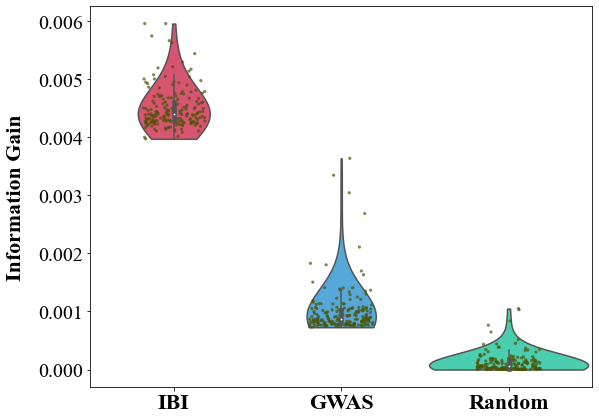

In [7]:
## Figure 3c ##

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

plt.figure(figsize=(9,7))
palette = sns.color_palette(["#ee3f65", "#3faeee", "#35e3bb" ]) # green "#55a868"
palette2 = sns.color_palette(['#4d5407','#4d5407', '#4d5407'])
ax = sns.violinplot(data=boxplot, x = 'Method',  y='Information Gain', palette=palette, aspect=.7, bw=1.15, cut=0, width=.95)
ax1 = sns.stripplot(x="Method", y="Information Gain", data=boxplot, jitter=0.19,  palette=palette2, size=3.2, zorder=1, alpha=0.7)
plt.xlabel(None, fontname="Times New Roman", size=22,fontweight="bold")
plt.ylabel('Information Gain', labelpad=12, fontname="Times New Roman", size=22,fontweight="bold")
plt.yticks(fontname="Times New Roman", size=20)
plt.xticks(fontname="Times New Roman", size=22,fontweight="bold")

In [7]:
### Figure 3a and 3b ###

## Step 1: Use OriginPro software 
## Step 2: Use its Manhattan plot app 
## Step 3: Generate plot for GWAS, and IBI